In [1]:
from os import path
import pandas as pd
import numpy as np
import seaborn as sn
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import ipywidgets as widgets
from ipywidgets import FloatSlider,IntSlider,interact
from sklearn.preprocessing import LabelEncoder
import warnings


warnings.filterwarnings('ignore')
sn.set()


In [2]:
data = pd.read_csv("cars_engage_2022.csv")

# Exploratory Data Analysis

In [3]:
data.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.tail()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
1271,1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1275,1275,Mitsubishi,Montero,3.2 At,"Rs. 68,62,560",3200 cc,4.0,4.0,AWD (All Wheel Drive),In-line,...,Yes,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN


In [5]:
data.describe()

,Unnamed: 0,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
count,1276.000000,1210.000000,1174.000000,1272.000000,1270.000000,1141.000000,29.000000
mean,637.500000,4.380992,3.977853,4.550314,5.270079,3.787029,1.793103
std,368.493781,1.660957,0.833763,0.747816,1.145231,2.522399,0.773642
min,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,318.750000,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000
50%,637.500000,4.000000,4.000000,5.000000,5.000000,2.000000,2.000000
75%,956.250000,4.000000,4.000000,5.000000,5.000000,6.000000,2.000000
max,1275.000000,16.000000,16.000000,5.000000,16.000000,14.000000,3.000000


In [6]:
data.shape

(1276, 141)

In [7]:
df2 = data

In [8]:
df2.columns

Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=141)

In [9]:
df2.nunique()

Unnamed: 0           1276
Make                   39
Model                 263
Variant              1064
Ex-Showroom_Price    1179
                     ... 
USB_Ports               3
Heads-Up_Display        1
Welcome_Lights          1
Battery                 5
Electric_Range          8
Length: 141, dtype: int64

# Data wrangling

In [10]:
df2.rename(columns = {'Ex-Showroom_Price' : 'Price','Unnamed: 0' : 'Index'}, inplace = True)

In [11]:
df2['Price']=df2['Price'].apply(lambda x:x.strip('Rs. '))
df2['Price']=df2['Price'].str.replace(',','')

In [12]:
df2['Price']=df2['Price'].astype('int')
df2['Price'].dtypes
df2.describe()

,Index,Price,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
count,1276.000000,1.276000e+03,1210.000000,1174.000000,1272.000000,1270.000000,1141.000000,29.000000
mean,637.500000,4.596538e+06,4.380992,3.977853,4.550314,5.270079,3.787029,1.793103
std,368.493781,1.214735e+07,1.660957,0.833763,0.747816,1.145231,2.522399,0.773642
min,0.000000,2.364470e+05,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,318.750000,7.438760e+05,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000
50%,637.500000,1.060064e+06,4.000000,4.000000,5.000000,5.000000,2.000000,2.000000
75%,956.250000,2.979828e+06,4.000000,4.000000,5.000000,5.000000,6.000000,2.000000
max,1275.000000,2.121554e+08,16.000000,16.000000,5.000000,16.000000,14.000000,3.000000


In [13]:
df2.replace('', np.NaN)

,Index,Make,Model,Variant,Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,292667,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,236447,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,296661,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,334768,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,272223,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1302000,1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,1421000,1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,1431000,1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,1201000,1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [14]:
df2['ARAI_Certified_Mileage']=df2['ARAI_Certified_Mileage'].str.replace("km/litre","")

In [15]:
df2['Fuel_Tank_Capacity']=df2['Fuel_Tank_Capacity'].str.replace("litres","").astype("float")

In [16]:
df2['Boot_Space']=df2['Boot_Space'].str.replace("litres","").astype("float")

# Handling Missing Values

<AxesSubplot:>

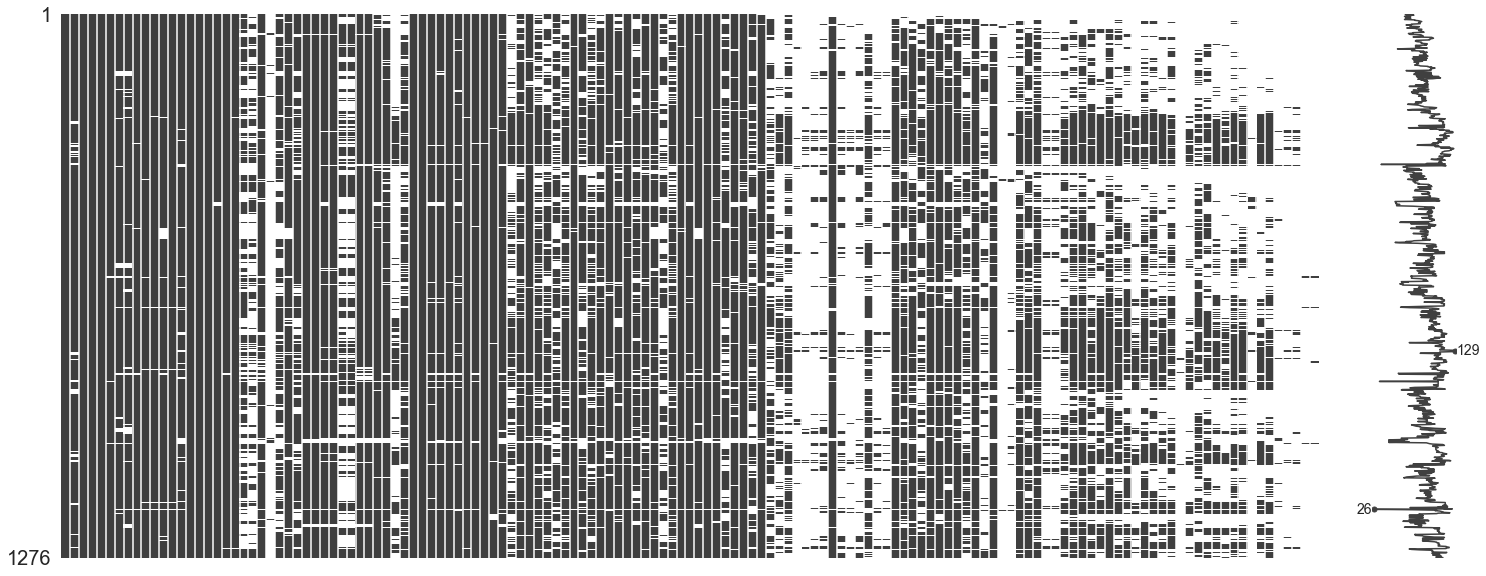

In [17]:
msno.matrix(df2)

In [18]:
df2.dropna(axis=1,thresh=len(df2)*0.8,inplace=True)

<AxesSubplot:>

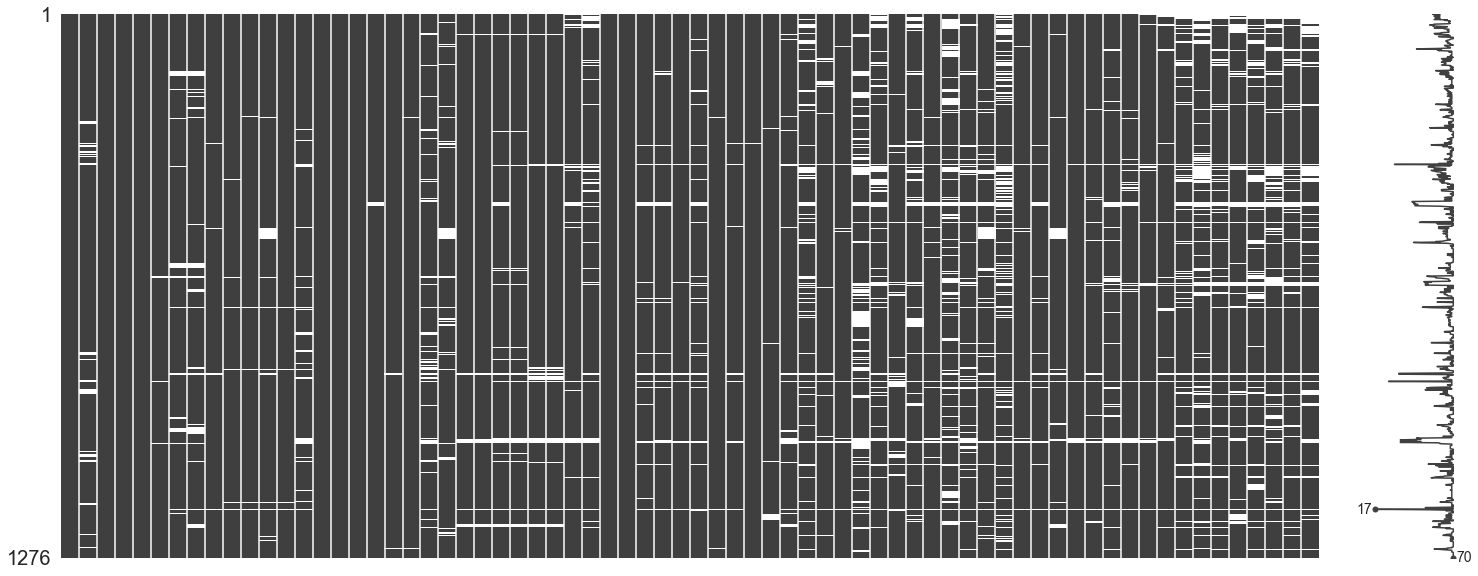

In [19]:
msno.matrix(df2)

In [20]:
df2.head()

,Index,Make,Model,Variant,Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Ventilation_System,Engine_Immobilizer,ABS_(Anti-lock_Braking_System),Adjustable_Headrests,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Number_of_Airbags,Adjustable_Steering_Column
0,0,Tata,Nano Genx,Xt,292667,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,236447,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,296661,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,Air Conditioning with cooling only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,334768,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,272223,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,Air Conditioning with cooling only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df2['Drivetrain'].unique()

array(['RWD (Rear Wheel Drive)', 'FWD (Front Wheel Drive)',
       'AWD (All Wheel Drive)', '4WD', nan], dtype=object)

In [22]:
df2['Make'].isnull().sum()

75

In [23]:
df2=df2[df2['Make'].notna()]

# Price Analysis

In [24]:
df2["Price"].describe()

count    1.201000e+03
mean     3.921370e+06
std      1.100012e+07
min      2.364470e+05
25%      7.337340e+05
50%      1.003552e+06
75%      2.196000e+06
max      2.121554e+08
Name: Price, dtype: float64

In [25]:
q_low = df2["Price"].quantile(0)
q_hi  = df2["Price"].quantile(0.85)

df2 = df2[(df2["Price"] < q_hi) & (df2["Price"] > q_low)]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Index', ylabel='Price'>

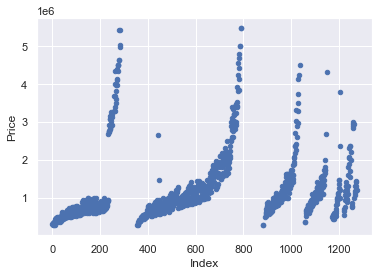

In [26]:
df2.plot.scatter(x = 'Index', y = 'Price')

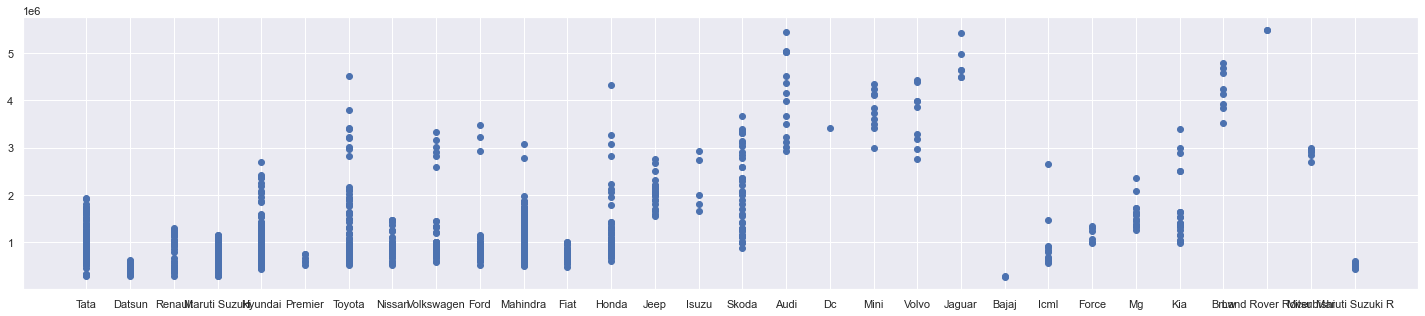

In [27]:
plt.figure(figsize=(25,5))
plt.scatter(df2.Make,df2.Price)
plt.show()

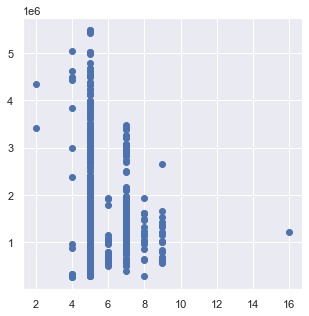

In [28]:
plt.figure(figsize=(5,5))
plt.scatter(df2.Seating_Capacity,df2.Price)
plt.show()

In [29]:
df2['Price'].value_counts(bins = 6, sort = False)

(257768.999, 1134833.333]     663
(1134833.333, 2006666.667]    216
(2006666.667, 2878500.0]       55
(2878500.0, 3750333.333]       49
(3750333.333, 4622166.667]     24
(4622166.667, 5494000.0]       12
Name: Price, dtype: int64

<AxesSubplot:>

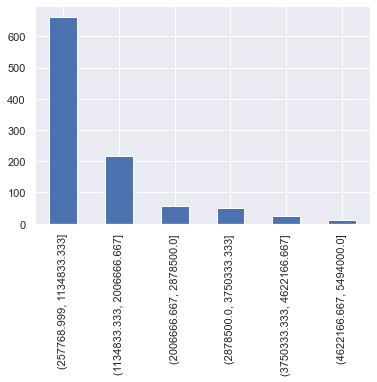

In [30]:
df2['Price'].value_counts(bins = 6, sort = False).plot(kind = 'bar')

# Model/ Make Analysis

In [31]:
df2["Make"].describe()

count              1019
unique               30
top       Maruti Suzuki
freq                149
Name: Make, dtype: object

<AxesSubplot:>

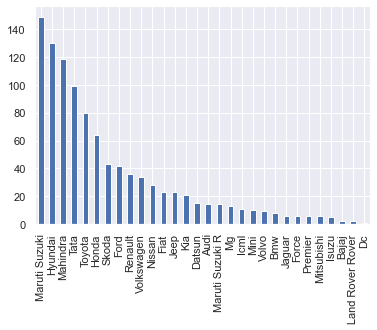

In [32]:
df2['Make'].value_counts().plot(kind = 'bar')

In [33]:
df2["Model"].describe()

count      1019
unique      160
top       Nexon
freq         24
Name: Model, dtype: object

In [34]:
df2['Model'].value_counts()

Nexon                24
Kuv100 Nxt           22
Xuv500               21
Compass              21
Amaze                20
                     ..
John Cooper Works     1
Abarth Avventura      1
Clubman               1
Cooper 5 Door         1
Avanti                1
Name: Model, Length: 160, dtype: int64

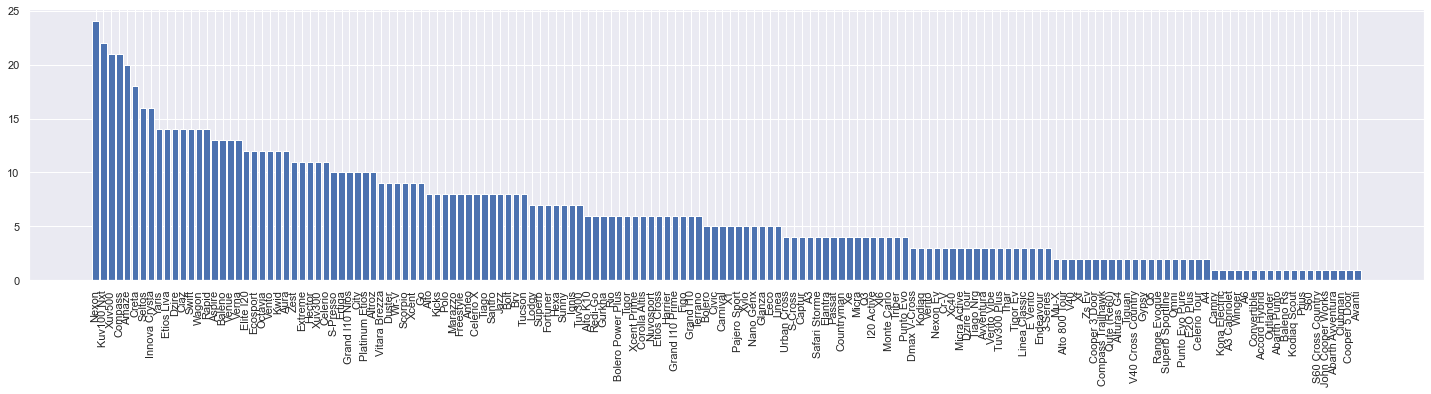

In [35]:
plt.figure(figsize=(25,5))
plt.bar(df2['Model'].value_counts().keys(),df2['Model'].value_counts().values)
plt.xticks(rotation=90)
plt.show()


# Mileage Analysis

In [36]:
df2['ARAI_Certified_Mileage']=pd.to_numeric(df2['ARAI_Certified_Mileage'])

In [37]:
df2["ARAI_Certified_Mileage"].describe()

count    949.000000
mean      19.389094
std        3.906841
min        9.620000
25%       16.800000
50%       19.500000
75%       22.050000
max       35.000000
Name: ARAI_Certified_Mileage, dtype: float64

<AxesSubplot:ylabel='ARAI_Certified_Mileage'>

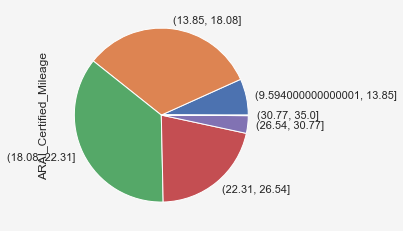

In [38]:
_,ax=plt.subplots(facecolor='whitesmoke')
df2['ARAI_Certified_Mileage'].value_counts(bins=6,sort=False).plot(kind="pie",ax=ax)

# Seating Capacity Analysis

In [39]:
df2["Seating_Capacity"].describe()

count    1016.000000
mean        5.389764
std         0.989429
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        16.000000
Name: Seating_Capacity, dtype: float64

<AxesSubplot:ylabel='Seating_Capacity'>

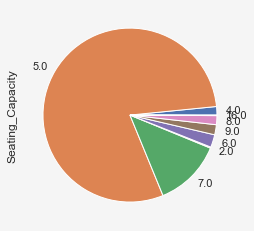

In [40]:
_,ax=plt.subplots(facecolor='whitesmoke')
df2['Seating_Capacity'].value_counts(sort = False).plot(kind = 'pie',ax=ax)

# Front Brakes Analysis

<AxesSubplot:ylabel='Front_Brakes'>

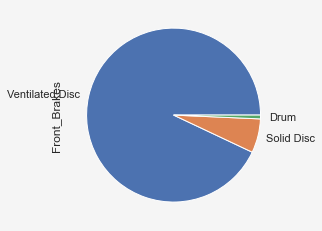

In [41]:
_,ax=plt.subplots(facecolor='whitesmoke')
df2['Front_Brakes'].value_counts().plot(kind = 'pie',ax=ax)

# Fuel Tank Capacity Analysis

In [42]:
df2["Fuel_Tank_Capacity"].describe()

count    973.000000
mean      46.601747
std       10.896536
min       15.000000
25%       37.000000
50%       45.000000
75%       55.000000
max       80.000000
Name: Fuel_Tank_Capacity, dtype: float64

In [43]:
df2['Fuel_Tank_Capacity'].fillna(df2['Fuel_Tank_Capacity'].median(), inplace = True)


<AxesSubplot:>

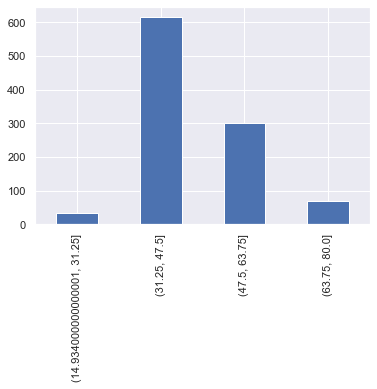

In [44]:
df2['Fuel_Tank_Capacity'].value_counts(bins = 4, sort = False).plot(kind = 'bar')

# Body Type Analysis

In [45]:
df2["Body_Type"].describe()

count     1018
unique      13
top        SUV
freq       338
Name: Body_Type, dtype: object

In [46]:
df2['Body_Type'].value_counts()

SUV                  338
Hatchback            313
Sedan                275
MUV                   37
MPV                   25
Crossover             18
Pick-up                3
Convertible            2
Crossover, SUV         2
SUV, Crossover         2
Coupe                  1
Sports, Hatchback      1
Sedan, Crossover       1
Name: Body_Type, dtype: int64

<AxesSubplot:>

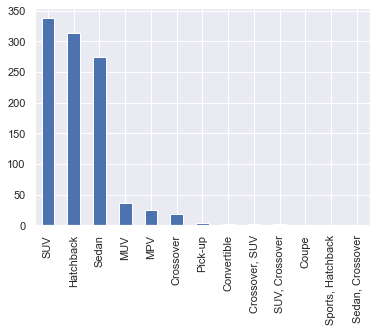

In [47]:
df2['Body_Type'].value_counts().plot(kind = 'bar')

# Boot Space analysis

In [48]:
df2["Boot_Space"].describe()

count     822.000000
mean      365.821168
std       144.135986
min        20.000000
25%       257.500000
50%       350.000000
75%       460.000000
max      1702.000000
Name: Boot_Space, dtype: float64

In [49]:
df2['Boot_Space'].value_counts()

350.0    42
475.0    31
510.0    28
251.0    27
460.0    25
         ..
560.0     1
360.0     1
432.0     1
215.0     1
550.0     1
Name: Boot_Space, Length: 91, dtype: int64

<AxesSubplot:>

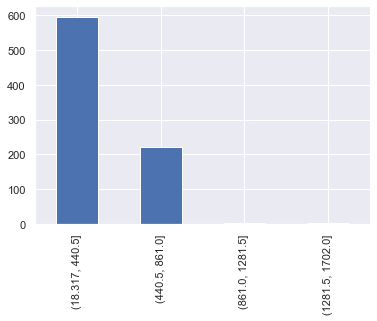

In [50]:
df2['Boot_Space'].value_counts(bins = 4, sort = False).plot(kind = 'bar')

In [51]:
df2["Child_Safety_Locks"].describe()

count     988
unique      1
top       Yes
freq      988
Name: Child_Safety_Locks, dtype: object

In [52]:
df2['Child_Safety_Locks'].value_counts()

Yes    988
Name: Child_Safety_Locks, dtype: int64

<AxesSubplot:>

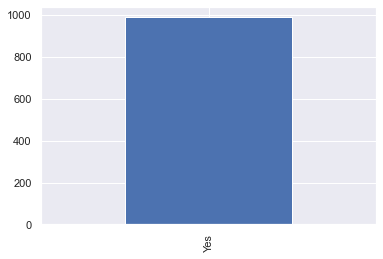

In [53]:
df2['Child_Safety_Locks'].value_counts().plot(kind = 'bar')

# Transmission types

In [54]:
df2["Type"].describe()

count       1019
unique         5
top       Manual
freq         715
Name: Type, dtype: object

In [55]:
df2['Type'].value_counts()

Manual       715
Automatic    276
AMT           18
DCT            7
CVT            3
Name: Type, dtype: int64

<AxesSubplot:>

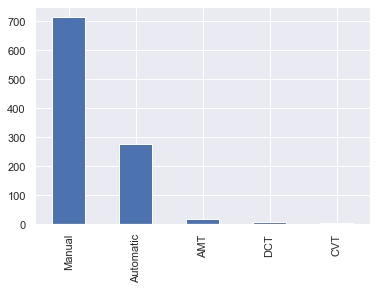

In [56]:
df2['Type'].value_counts().plot(kind = 'bar')

# Fuel type Analysis

In [57]:
df2["Fuel_Type"].describe()

count       1019
unique         6
top       Diesel
freq         492
Name: Fuel_Type, dtype: object

In [58]:
df2['Fuel_Type'].value_counts()

Diesel          492
Petrol          485
CNG              16
Electric         14
CNG + Petrol      6
Hybrid            6
Name: Fuel_Type, dtype: int64

<AxesSubplot:>

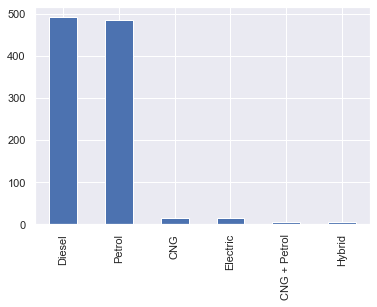

In [59]:
df2['Fuel_Type'].value_counts().plot(kind = 'bar')

# Customer Segmentation by Price

In [60]:
segment1 = df2.loc[(df2 ["Price"]>233492.446) & (df2 ["Price"]<728872.5)]['Model'].value_counts()

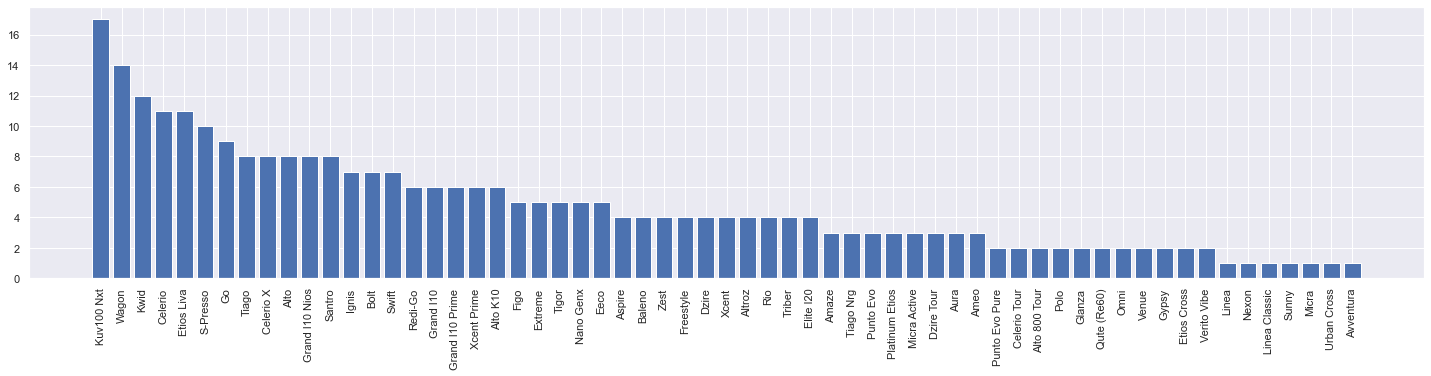

In [61]:
plt.figure(figsize=(25,5))
plt.bar(segment1.keys(), segment1.values)
plt.xticks(rotation=90)
plt.show()

In [62]:
segment2 = df2.loc[(df2 ["Price"]>728872.5) & (df2 ["Price"]<1221298.0)]['Model'].value_counts()

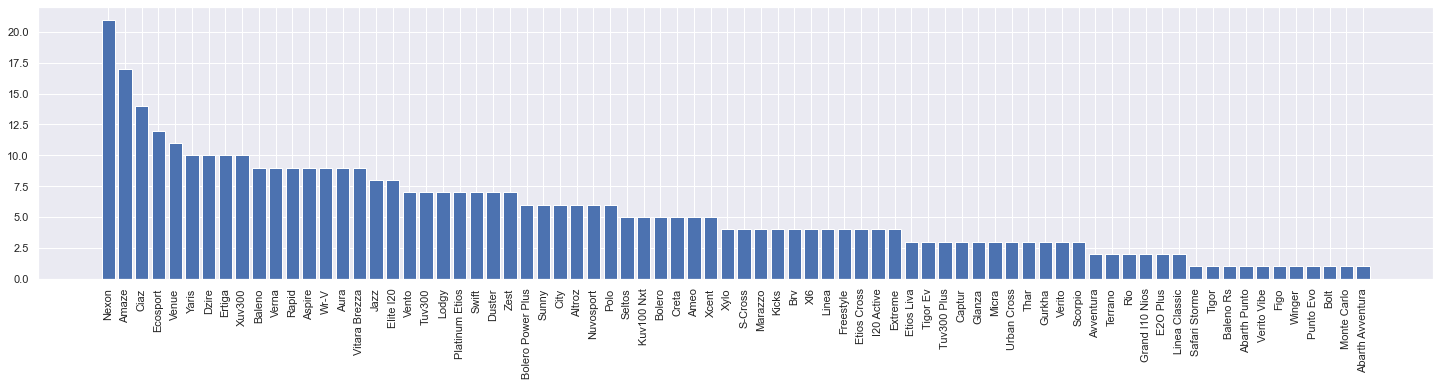

In [63]:
plt.figure(figsize=(25,5))
plt.bar(segment2.keys(), segment2.values)
plt.xticks(rotation=90)
plt.show()

In [64]:
segment3 = df2.loc[(df2 ["Price"]>1221298.0) & (df2 ["Price"]<1713723.5)]['Model'].value_counts()

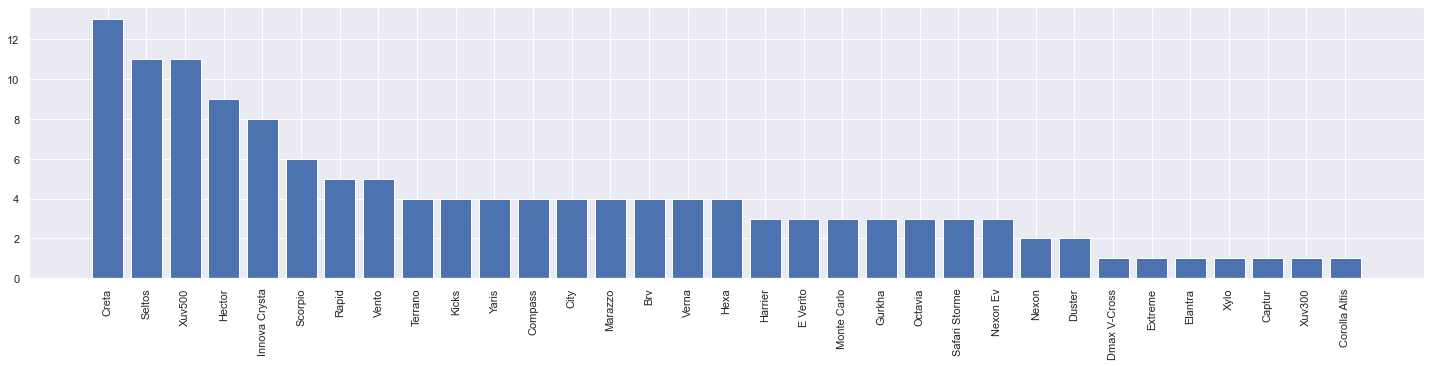

In [65]:
plt.figure(figsize=(25,5))
plt.bar(segment3.keys(), segment3.values)
plt.xticks(rotation=90)
plt.show()

In [66]:
segment4 = df2.loc[(df2 ["Price"]>1713723.5) & (df2 ["Price"]<2206149.0)]['Model'].value_counts()

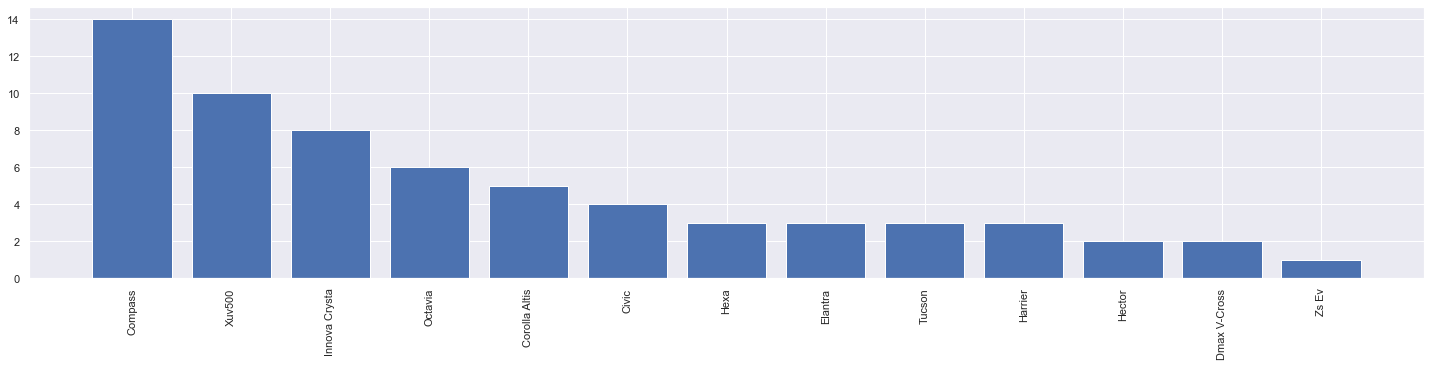

In [67]:
plt.figure(figsize=(25,5))
plt.bar(segment4.keys(), segment4.values)
plt.xticks(rotation=90)
plt.show()

In [68]:
segment5 = df2.loc[(df2 ["Price"]>2206149.0) & (df2 ["Price"]<2698574.5)]['Model'].value_counts()

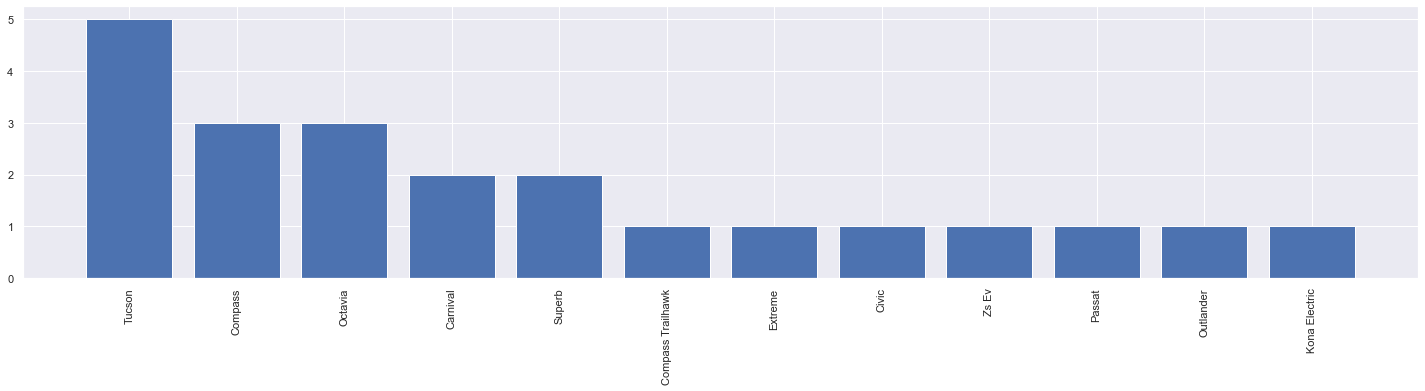

In [69]:
plt.figure(figsize=(25,5))
plt.bar(segment5.keys(), segment5.values)
plt.xticks(rotation=90)
plt.show()

In [70]:
segment6 = df2.loc[(df2 ["Price"]>2698574.5) & (df2 ["Price"]<3191000.0)]['Model'].value_counts()

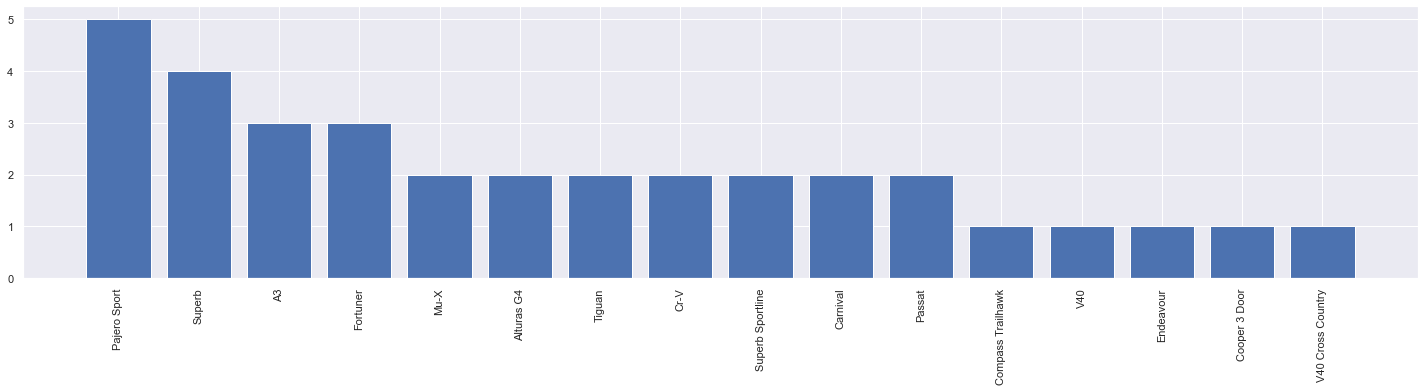

In [71]:
plt.figure(figsize=(25,5))
plt.bar(segment6.keys(), segment6.values)
plt.xticks(rotation=90)
plt.show()

# Encoding 

In [72]:
le = LabelEncoder()
label = le.fit_transform(df2["Type"])

In [73]:
label

array([4, 4, 1, ..., 4, 1, 1])

In [74]:
df2 = df2.drop("Type",axis ="columns" )

In [75]:
df2['Type']=label

In [76]:
df2["Type"]

0       4
2       4
3       1
4       4
5       1
       ..
1270    4
1271    4
1272    4
1273    1
1274    1
Name: Type, Length: 1019, dtype: int32

In [77]:
df2["Child_Safety_Locks"]
le = LabelEncoder()
label = le.fit_transform(df2["Child_Safety_Locks"])
df2 = df2.drop("Child_Safety_Locks",axis ="columns" )
df2['Child_Safety_Locks']=label
df2["Child_Safety_Locks"]

0       0
2       0
3       0
4       0
5       0
       ..
1270    0
1271    0
1272    0
1273    0
1274    0
Name: Child_Safety_Locks, Length: 1019, dtype: int32

# Recommendation Engine

In [78]:

test = df2[["Price","ARAI_Certified_Mileage","Seating_Capacity","Fuel_Tank_Capacity","Boot_Space","Child_Safety_Locks","Type"]]
test.fillna(0, inplace = True)
# Create K-Nearest Neighbors
nn = NearestNeighbors(n_neighbors=1).fit(test)
def f(Price,Mileage,Seating_Capacity,Fuel_Tank,Boot_Space,Child_Safety_Locks,Type):
    res=df2.iloc[nn.kneighbors([[Price,Mileage,Seating_Capacity,Fuel_Tank,Boot_Space,Child_Safety_Locks,Type]])[1][0][0]]
    return res
interact(f, Price=(200000,1000000),Mileage=(0,50),Seating_Capacity=(0,7),Fuel_Tank=(0,80),Boot_Space=(0,1702),Child_Safety_Locks=(0,1),Type=(0,4))



interactive(children=(IntSlider(value=600000, description='Price', max=1000000, min=200000), IntSlider(value=2…

<function __main__.f(Price, Mileage, Seating_Capacity, Fuel_Tank, Boot_Space, Child_Safety_Locks, Type)>

# Export Cleaned Data

In [79]:
# To export cleaned data , this output is already in 'cleaneddata.csv'
# df2.to_csv("cleaneddata.csv")